# Description
In this notebook we process focal series data from IC Titan to extract the exit wave. We use the ExitWaveReconstruction code from C. Doberstein, which can be found [here](https://github.com/CDoberstein/ExitWaveReconstruction). This notebook only works on Linux as the binaries for EWR are only available on this platform.

In [1]:
%matplotlib notebook

In [112]:
from importlib import reload

# 0. Inspect the data

In [2]:
from tools import data_utils as du

/Users/nielscautaerts/opt/anaconda3/envs/devel/lib/python3.8/site-packages/pyUSID/viz/__init__.py:16: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  warn('Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. '


In [3]:
data_path = "data/4thfocus_series_2nm/"

<IPython.core.display.Javascript object>


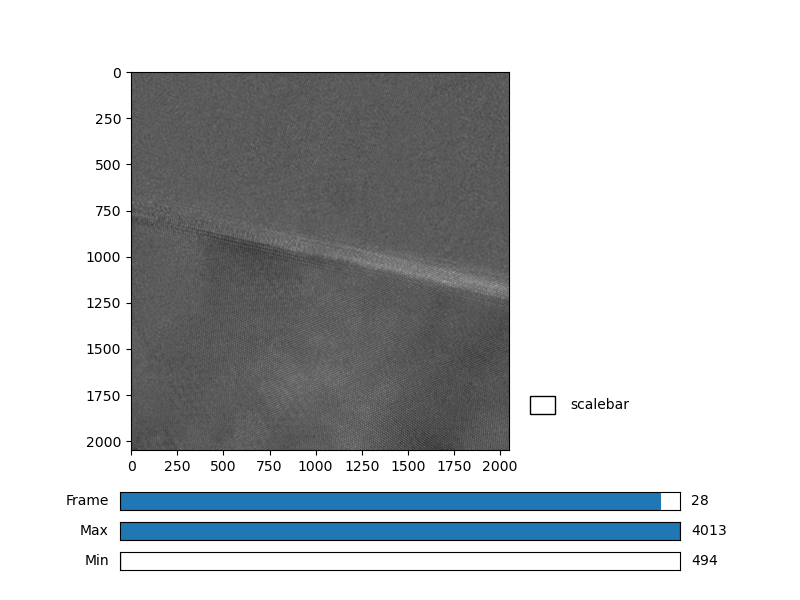

In [8]:
du.inspect_folder(data_path)

# 1. Setup
The first step is to define the folder in which the images are stored and run the `setup_ewr` function imported from the conversion.
This will create a folder structure and default configuration file used by the code.
You need write priviledges to the folder of interest!

In [4]:
from tools import ewr

In [5]:
ewr.setup_ewr(data_path, estimate_shifts=False)

Created config file in /Users/nielscautaerts/Documents/PythonProjects/ZZZJupyterNotebook/200804AlFocal/config.param


# 2. Editing the configuration file
The second step is to edit the values for the standard configuration file if they were not added as keyword arguments in setup_ewr. This can be done outside of python also by editing the file with a text editor.

In [6]:
from tools import config_tools as ct
config = ct.load_config("config.param")

In [10]:
# changing the coherence parameters
config.alpha=0.0005
# choosing a region of interest to reduce calculation time
config.subsection_x = 700
config.subsection_y = 650
config.subsection_width = 600
config.subsection_height = 600
config.save("config.param")

# 3. Running the code
We run the code on the config file

In [100]:
!Reconstruction config.param

zsh:1: command not found: Reconstruction


# 4. Analyzing and visualizing the result
First we process the output with the `process_output` function. Then we can use tools such as [Hyperspy](https://hyperspy.org/) and [TEMMETA](https://pypi.org/project/temmeta/) to plot, analyze and filter the results further.